### This is the practice visualizations to make in the Syncronous session UN course
#### The data required are two files
#### 1. Births by country and region 2011
#### 2. Total population in 2011 by country and region


In [3]:
import os
import sys
import json
from matplotlib.cm import get_cmap
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import countrygroups as cg
from difflib import SequenceMatcher
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

In [4]:
file_births = 'UNdata_Export_20210803_221145723'
file_population = 'UNdata_Export_20210804_092021500'
file_deaths = 'UNdata_Export_20210805_221643359'  # Crude death rate CDR

In [5]:
#     cg.UNSTATS_GEOGRAPHICAL_REGIONS.AFRICA.names
#     dir(cg)

In [6]:
# read datasets
births_df = pd.read_csv(file_births +'.csv', header=0)
population_df = pd.read_csv(file_population +'.csv', header=0) 
deaths_df = pdf = pd.read_csv(file_deaths +'.csv', header=0) 

In [7]:
deaths_df

,Country or Area,Year,Source,Unit,Value,Value Footnotes
0,Afghanistan,2011,UN_United Nations Population Division,Per 1000 population,16,NaN
1,Albania,2011,UN_United Nations Population Division,Per 1000 population,6,NaN
2,Algeria,2011,UN_United Nations Population Division,Per 1000 population,5,NaN
3,Angola,2011,UN_United Nations Population Division,Per 1000 population,14,NaN
4,Argentina,2011,UN_United Nations Population Division,Per 1000 population,8,NaN
...,...,...,...,...,...,...
185,Western and Central Africa,2011,UN_United Nations Population Division,Per 1000 population,13,1.0
186,World,2011,UN_United Nations Population Division,Per 1000 population,8,1.0
187,Yemen,2011,UN_United Nations Population Division,Per 1000 population,6,NaN
188,Zambia,2011,UN_United Nations Population Division,Per 1000 population,15,NaN


In [8]:
# delete footnote in births and deaths
# I did it by hand. 

In [9]:
# sudan issue in Population there are two sudans Sudan and South sudan
# we add them in  row 'Sudan'
# South Sudan + Sudan

a = population_df[((population_df['Country or Area'] == 'Sudan') | 
                   (population_df['Country or Area']== 'South Sudan'))]['Value'].sum()
print('sudan',a)
population_df.loc[(population_df['Country or Area'] == 'Sudan'),'Value'] = a


sudan 45180.380000000005


In [10]:
# merge the three  dataframes into one
births_df.set_index('Country or Area')
population_df.set_index('Country or Area')
deaths_df.set_index('Country or Area')


,Year,Source,Unit,Value,Value Footnotes
Country or Area,,,,,
Afghanistan,2011,UN_United Nations Population Division,Per 1000 population,16,NaN
Albania,2011,UN_United Nations Population Division,Per 1000 population,6,NaN
Algeria,2011,UN_United Nations Population Division,Per 1000 population,5,NaN
Angola,2011,UN_United Nations Population Division,Per 1000 population,14,NaN
Argentina,2011,UN_United Nations Population Division,Per 1000 population,8,NaN
...,...,...,...,...,...
Western and Central Africa,2011,UN_United Nations Population Division,Per 1000 population,13,1.0
World,2011,UN_United Nations Population Division,Per 1000 population,8,1.0
Yemen,2011,UN_United Nations Population Division,Per 1000 population,6,NaN


In [11]:
# The second one is the right one (as set by the Statistics UN division)
synonyms = [['Cape Verde', 'Cabo Verde'], 
            ['Czech Republic','Czechia'],
            ["Dem. People's Republic of Korea", "Democratic People's Republic of Korea"],
            ["Micronesia (Fed. States of)", 'Micronesia (Federated States of)'],
            ['Swaziland','Eswatini'],
            ['The former Yugoslav Republic of Macedonia','North Macedonia'],
            ['United States', 'United States of America'],    
            ['Sudan (pre-cession)','Sudan'],
            ['United Kingdom','United Kingdom of Great Britain and Northern Ireland'],
            ["Côte d'Ivoire", 'Côte d’Ivoire']
           ]

In [12]:
# use UN statistics data as the 'right' data
for a in synonyms:
   deaths_df.loc[(deaths_df['Country or Area'] == a[0]),  ['Country or Area']]= a[1]
   births_df.loc[(births_df['Country or Area'] == a[0]),  ['Country or Area']]= a[1]
   population_df.loc[(population_df['Country or Area'] == a[0]),  ['Country or Area']]= a[1]
births_df = births_df[births_df['Value Footnotes'] != 1]
deaths_df = deaths_df[deaths_df['Value Footnotes'] != 1]

In [13]:
df =pd.read_csv('UNSD - Methodology.csv', header=0)
standard_names = df['Country or Area'].tolist()
a_set = set(standard_names)
a1_set = set( births_df['Country or Area'].tolist())
a2_set = set( deaths_df['Country or Area'].tolist())
b_set = a_set & a1_set
print(a1_set-b_set)
b_set = a_set & a2_set
print(a2_set - b_set)
# This is to verify if in our files there is a name that is not in the statistics file

set()
set()


In [14]:
merged_df = pd.merge(births_df, population_df, on=["Country or Area", "Country or Area"], how = 'outer')
merged_df = pd.merge(merged_df, deaths_df, on=["Country or Area", "Country or Area"], how = 'outer')

In [15]:
merged_df

,Country or Area,Subgroup,Year_x,Source_x,Unit_x,Value_x,Value Footnotes_x,Year(s),Variant,Value_y,Year_y,Source_y,Unit_y,Value,Value Footnotes_y
0,Afghanistan,Total,2011.0,UN_United Nations Population Division,Thousand,1408.0,NaN,2011,Medium,30117.413,2011.0,UN_United Nations Population Division,Per 1000 population,16.0,NaN
1,Albania,Total,2011.0,UN_United Nations Population Division,Thousand,41.0,NaN,2011,Medium,2928.592,2011.0,UN_United Nations Population Division,Per 1000 population,6.0,NaN
2,Algeria,Total,2011.0,UN_United Nations Population Division,Thousand,712.0,NaN,2011,Medium,36661.445,2011.0,UN_United Nations Population Division,Per 1000 population,5.0,NaN
3,Angola,Total,2011.0,UN_United Nations Population Division,Thousand,803.0,NaN,2011,Medium,24220.661,2011.0,UN_United Nations Population Division,Per 1000 population,14.0,NaN
4,Argentina,Total,2011.0,UN_United Nations Population Division,Thousand,693.0,NaN,2011,Medium,41320.500,2011.0,UN_United Nations Population Division,Per 1000 population,8.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,Western Africa,NaN,NaN,NaN,NaN,NaN,NaN,2011,Medium,315538.372,NaN,NaN,NaN,NaN,NaN
281,Western Asia,NaN,NaN,NaN,NaN,NaN,NaN,2011,Medium,237735.793,NaN,NaN,NaN,NaN,NaN
282,Western Europe,NaN,NaN,NaN,NaN,NaN,NaN,2011,Medium,188782.022,NaN,NaN,NaN,NaN,NaN
283,Western Sahara,NaN,NaN,NaN,NaN,NaN,NaN,2011,Medium,487.650,NaN,NaN,NaN,NaN,NaN


In [16]:
merged_df = merged_df[merged_df['Source_x'].notnull()]
merged_df = merged_df[merged_df['Value Footnotes_x'] != 1]
merged_df = merged_df[merged_df['Source_y'].notnull()]
merged_df = merged_df[merged_df['Value Footnotes_y'] != 1]

In [17]:
# delete columns


merged_df = merged_df.drop(columns=['Subgroup', 'Year_x', 'Source_x', 'Unit_x',
       'Value Footnotes_x', 'Year(s)', 'Variant',
       'Year_y', 'Source_y', 'Unit_y', 'Value Footnotes_y'])
merged_df = merged_df.rename(columns={'Value_x': 'Births', 'Value_y': 'Population', 'Value': 'Deaths_ratio'})

In [18]:
merged_df.to_csv('UN_births_population_deaths(cleaned).csv', encoding='utf-8-sig') # utf-8-sig is to avoid cote d'ivoire issue

In [19]:
#estimate total number of deaths
merged_df['Deaths'] = (merged_df['Population'] * merged_df['Deaths_ratio'])/1000

In [20]:
merged_df.to_csv('UN_births_population_deaths(cleaned).csv', encoding='utf-8-sig') # utf-8-sig is to avoid cote d'ivoire issue

In [21]:
# Phase 2 - add Regions

In [22]:
file_statistics = 'UNSD - Methodology'
stats_df = pd.read_csv(file_statistics +'.csv', header=0)

In [23]:
stats_df.set_index('Country or Area')
merged_df = pd.merge(merged_df, stats_df, on=["Country or Area", "Country or Area"], how = 'outer')
merged_df = merged_df[merged_df['Births'].notna()] # delete rows that have been created with NANs 

In [25]:
# create a ratio births/1000 population
merged_df['Ratio'] = merged_df['Births']/(merged_df['Population']/1000)

In [26]:
merged_df[merged_df['Country or Area'] == 'Spain']

,Country or Area,Births,Population,Deaths_ratio,Deaths,Global Code,Global Name,Region Code,Region Name,Sub-region Code,...,Intermediate Region Name,M49 Code,ISO-alpha2 Code,ISO-alpha3 Code,Least Developed Countries (LDC),Land Locked Developing Countries (LLDC),Small Island Developing States (SIDS),Developed / Developing Countries,Unnamed: 16,Ratio
149,Spain,499.0,47084.24,9.0,423.75816,1,World,150.0,Europe,39.0,...,NaN,724,ES,ESP,NaN,NaN,NaN,Developed,NaN,10.598026


In [27]:
merged_df

,Country or Area,Births,Population,Deaths_ratio,Deaths,Global Code,Global Name,Region Code,Region Name,Sub-region Code,...,Intermediate Region Name,M49 Code,ISO-alpha2 Code,ISO-alpha3 Code,Least Developed Countries (LDC),Land Locked Developing Countries (LLDC),Small Island Developing States (SIDS),Developed / Developing Countries,Unnamed: 16,Ratio
0,Afghanistan,1408.0,30117.413,16.0,481.878608,1,World,142.0,Asia,34.0,...,NaN,4,AF,AFG,x,x,NaN,Developing,NaN,46.750363
1,Albania,41.0,2928.592,6.0,17.571552,1,World,150.0,Europe,39.0,...,NaN,8,AL,ALB,NaN,NaN,NaN,Developed,NaN,13.999902
2,Algeria,712.0,36661.445,5.0,183.307225,1,World,2.0,Africa,15.0,...,NaN,12,DZ,DZA,NaN,NaN,NaN,Developing,NaN,19.420948
3,Angola,803.0,24220.661,14.0,339.089254,1,World,2.0,Africa,202.0,...,Middle Africa,24,AO,AGO,x,NaN,NaN,Developing,NaN,33.153513
4,Argentina,693.0,41320.500,8.0,330.564000,1,World,19.0,Americas,419.0,...,South America,32,AR,ARG,NaN,NaN,NaN,Developing,NaN,16.771336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,Venezuela (Bolivarian Republic of),598.0,28887.874,5.0,144.439370,1,World,19.0,Americas,419.0,...,South America,862,VE,VEN,NaN,NaN,NaN,Developing,NaN,20.700727
178,Viet Nam,1458.0,88871.380,5.0,444.356900,1,World,142.0,Asia,35.0,...,NaN,704,VN,VNM,NaN,NaN,NaN,Developing,NaN,16.405732
179,Yemen,940.0,23807.588,6.0,142.845528,1,World,142.0,Asia,145.0,...,NaN,887,YE,YEM,x,NaN,NaN,Developing,NaN,39.483210
180,Zambia,622.0,14023.203,15.0,210.348045,1,World,2.0,Africa,202.0,...,Eastern Africa,894,ZM,ZMB,x,x,NaN,Developing,NaN,44.355059


In [26]:
merged_df.columns

Index(['Unnamed: 0', 'Country or Area', 'Births', 'Population', 'Deaths_ratio',
       'Deaths', 'Global Code', 'Global Name', 'Region Code', 'Region Name',
       'Sub-region Code', 'Sub-region Name', 'Intermediate Region Code',
       'Intermediate Region Name', 'M49 Code', 'ISO-alpha2 Code',
       'ISO-alpha3 Code', 'Least Developed Countries (LDC)',
       'Land Locked Developing Countries (LLDC)',
       'Small Island Developing States (SIDS)',
       'Developed / Developing Countries', 'Unnamed: 16', 'Ratio',
       'birth_rate', 'death_rate'],
      dtype='object')

In [28]:
# some figures

In [29]:
merged_df.to_csv('pollastre.csv', encoding='utf-8-sig') # utf-8-sig is to avoid cote d'ivoire issue
# aqui lee el dataframe para aislar todo el codigo de arriba


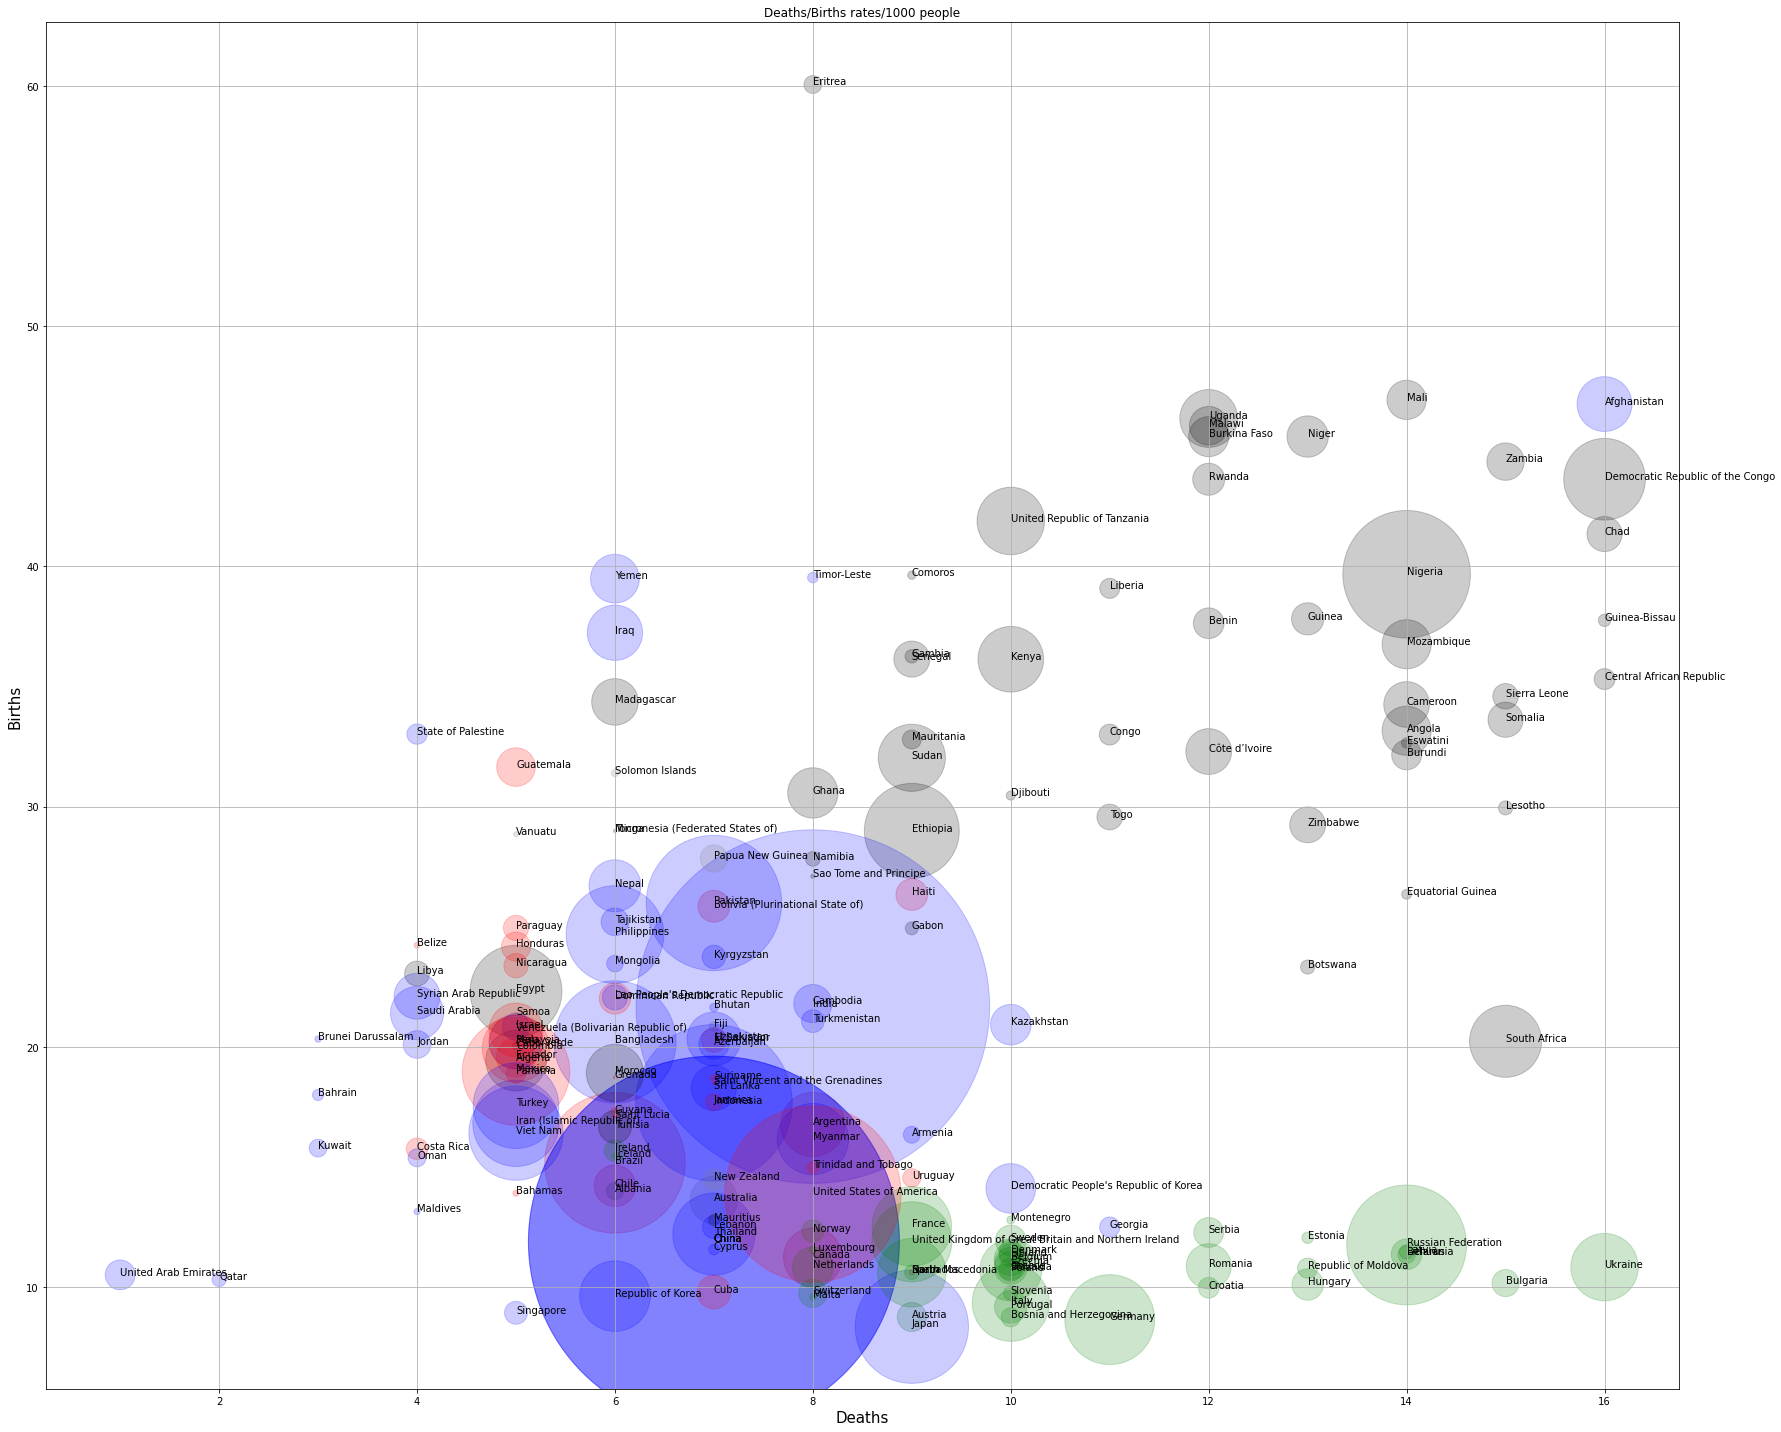

In [40]:
merged_df = pd.read_csv('pollastre.csv', header=0) 
#1 population scaterplot with Matplotlib

#

merged_df['birth_rate'] = merged_df['Births'] / (merged_df['Population'] / 1000)
merged_df['death_rate'] = merged_df['Deaths'] / (merged_df['Population'] / 1000)

# Marker size in units of points^2
v_size = merged_df['Population']/10

# Colors
colors = {'Americas':'red', 'Europe':'green', 'Asia':'blue', 'Oceanias':'yellow', 'Africa': 'black', 
           'Oceania': 'grey'}

plt.rcParams["figure.figsize"] = (25,20)
fig, ax = plt.subplots()
ax.scatter(merged_df['death_rate'], merged_df['birth_rate'], s=v_size, c = [colors[r] for r in merged_df['Region Name']], alpha=0.2)



ax.set_xlabel(r'Deaths', fontsize=15)
ax.set_ylabel(r'Births', fontsize=15)
ax.set_title('Deaths/Births rates/1000 people')

y = merged_df['birth_rate'].to_list()
z = merged_df['death_rate'].to_list()
n = merged_df['Country or Area'].to_list()

ax.grid(True)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]))
fig.tight_layout()

plt.show()


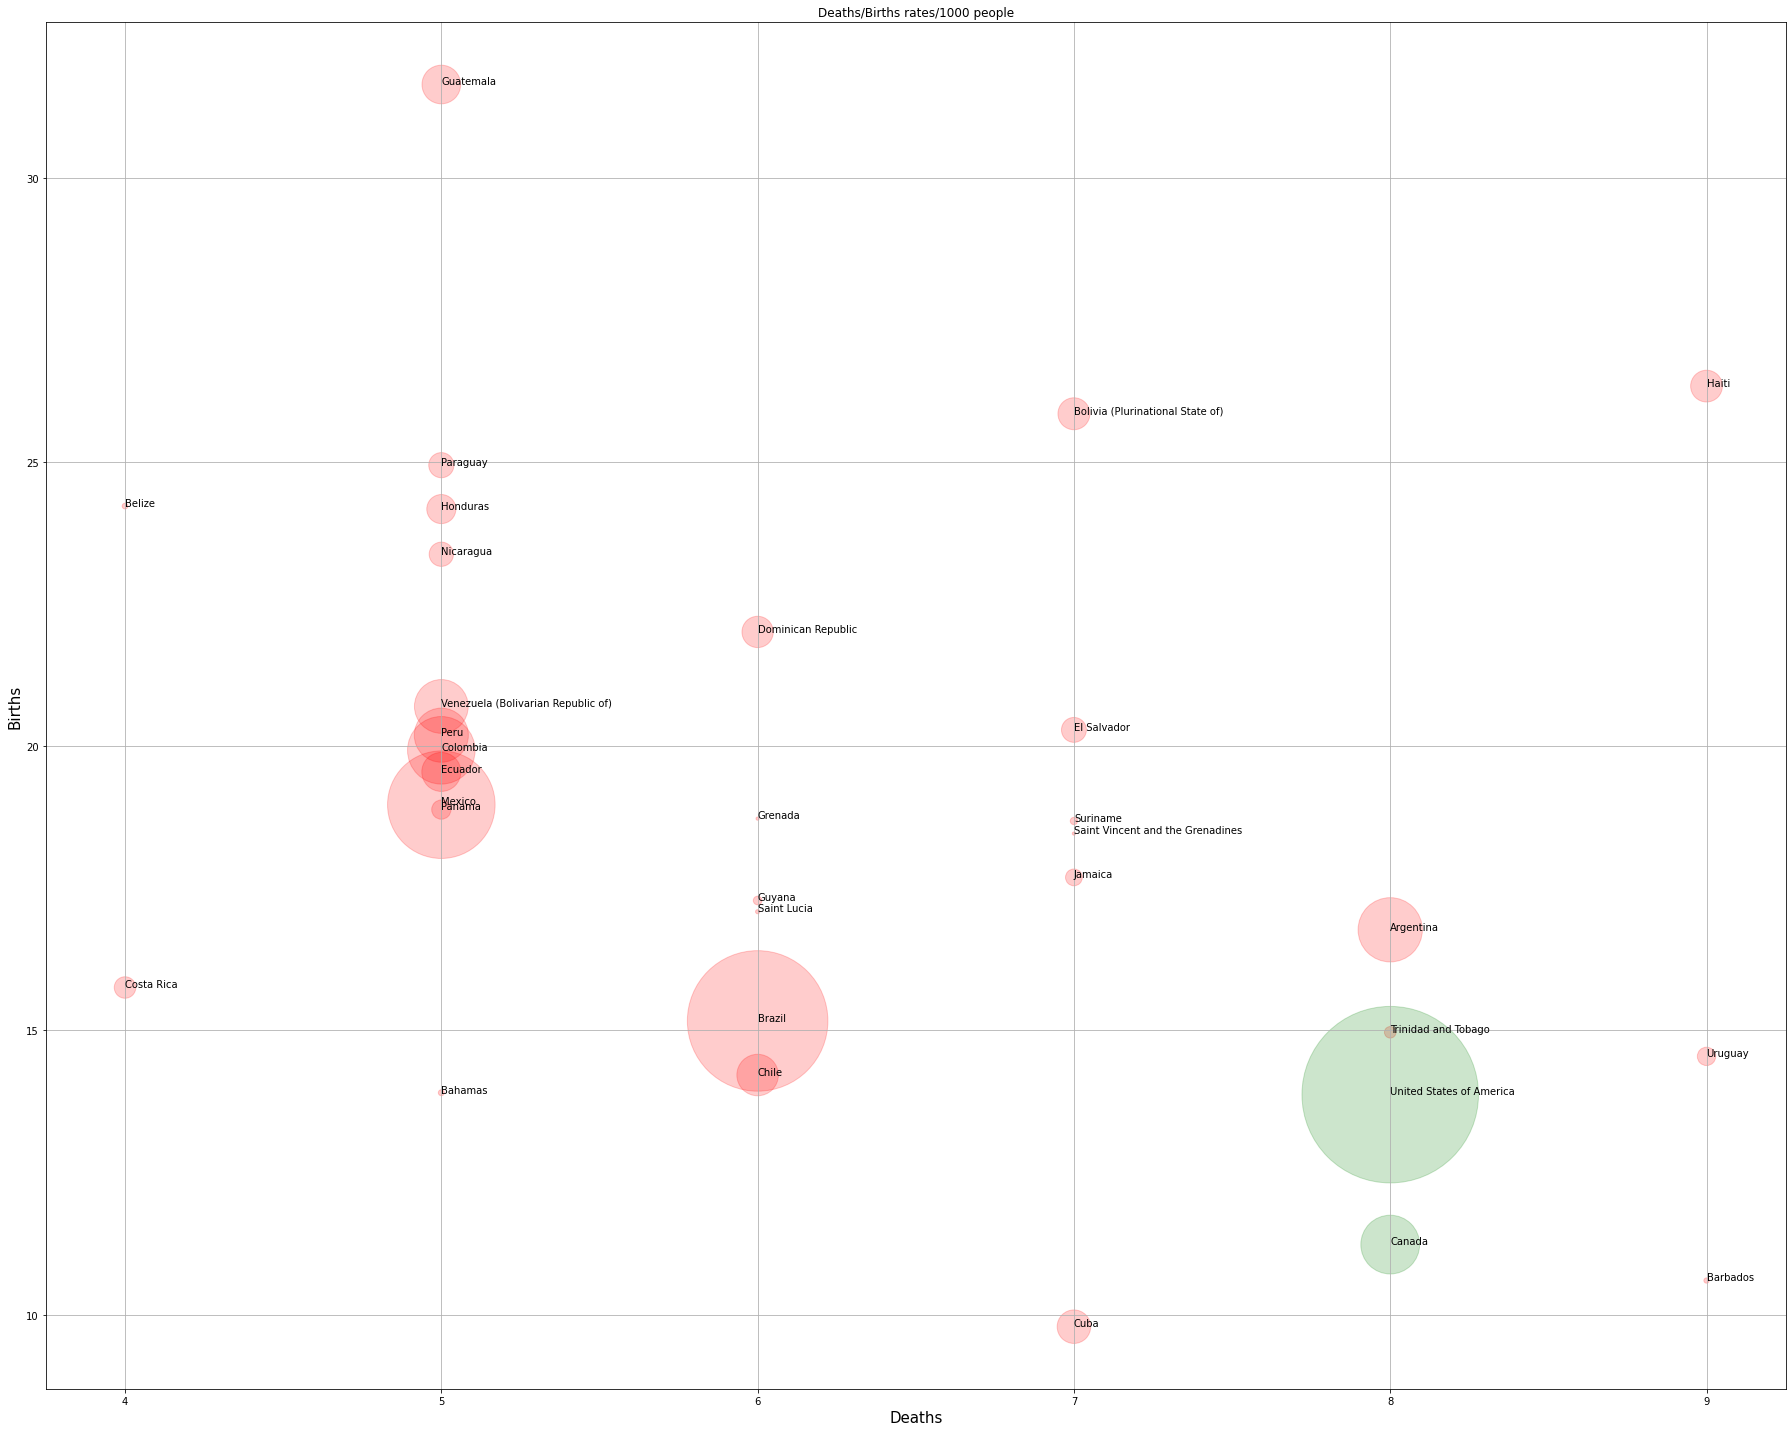

In [54]:
# Subregions
merged_df = pd.read_csv('pollastre.csv', header=0) 
#1 population scaterplot with Matplotlib
merged_df=merged_df[merged_df['Region Name']=='Americas']

#

merged_df['birth_rate'] = merged_df['Births'] / (merged_df['Population'] / 1000)
merged_df['death_rate'] = merged_df['Deaths'] / (merged_df['Population'] / 1000)

# Marker size in units of points^2
v_size = merged_df['Population']/10

# Colors
colors1 = {'Southern Asia':'red', 'Western Asia': 'green', 'Central Asia': 'blue', 'South-eastern Asia':'yellow',
          'Eastern Asia': 'black',
          'Southern Europe': 'red', 'Western Europe': 'green', 'Northern Europe':'blue',  'Eastern Europe':'yellow',
          'Northern Africa': 'red', 'Sub-Saharan Africa':'blue', 
          'Latin America and the Caribbean': 'red', 'Northern America':'green',
          'Micronesia': 'red', 'Polynesia':'green', 'Australia and New Zealand': 'blue','Melanesia':'yellow'}
   

#colors = {'Americas':'red', 'Europe':'green', 'Asia':'blue', 'Oceanias':'yellow', 'Africa': 'black', 
#           'Oceania': 'grey'}

plt.rcParams["figure.figsize"] = (25,20)
fig, ax = plt.subplots()
ax.scatter(merged_df['death_rate'], merged_df['birth_rate'], s=v_size, 
           c = [colors1[r] for r in merged_df['Sub-region Name']], alpha=0.2)



ax.set_xlabel(r'Deaths', fontsize=15)
ax.set_ylabel(r'Births', fontsize=15)
ax.set_title('Deaths/Births rates/1000 people')

y = merged_df['birth_rate'].to_list()
z = merged_df['death_rate'].to_list()
n = merged_df['Country or Area'].to_list()

ax.grid(True)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]))
fig.tight_layout()

plt.show()

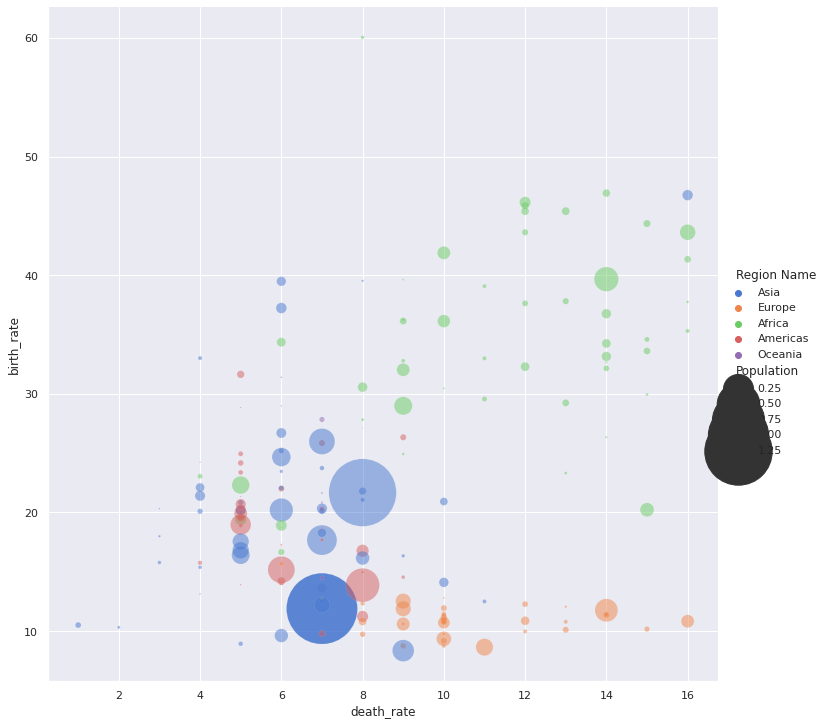

In [25]:
# now with Seaborn
merged_df = pd.read_csv('pollastre.csv', header=0) 
import seaborn as sns
sns.set_theme()
from matplotlib import rcParams

merged_df['birth_rate'] = merged_df['Births'] / (merged_df['Population'] / 1000)
merged_df['death_rate'] = merged_df['Deaths'] / (merged_df['Population'] / 1000)

# figure size in inches

sns.set(rc={'figure.figsize':(40,40)})
rcParams['figure.figsize'] = 20,20

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="death_rate", y="birth_rate", hue="Region Name", size="Population",
            sizes=(1, 5000), alpha=0.5, palette="muted", height=10, data=merged_df)
plt.show()

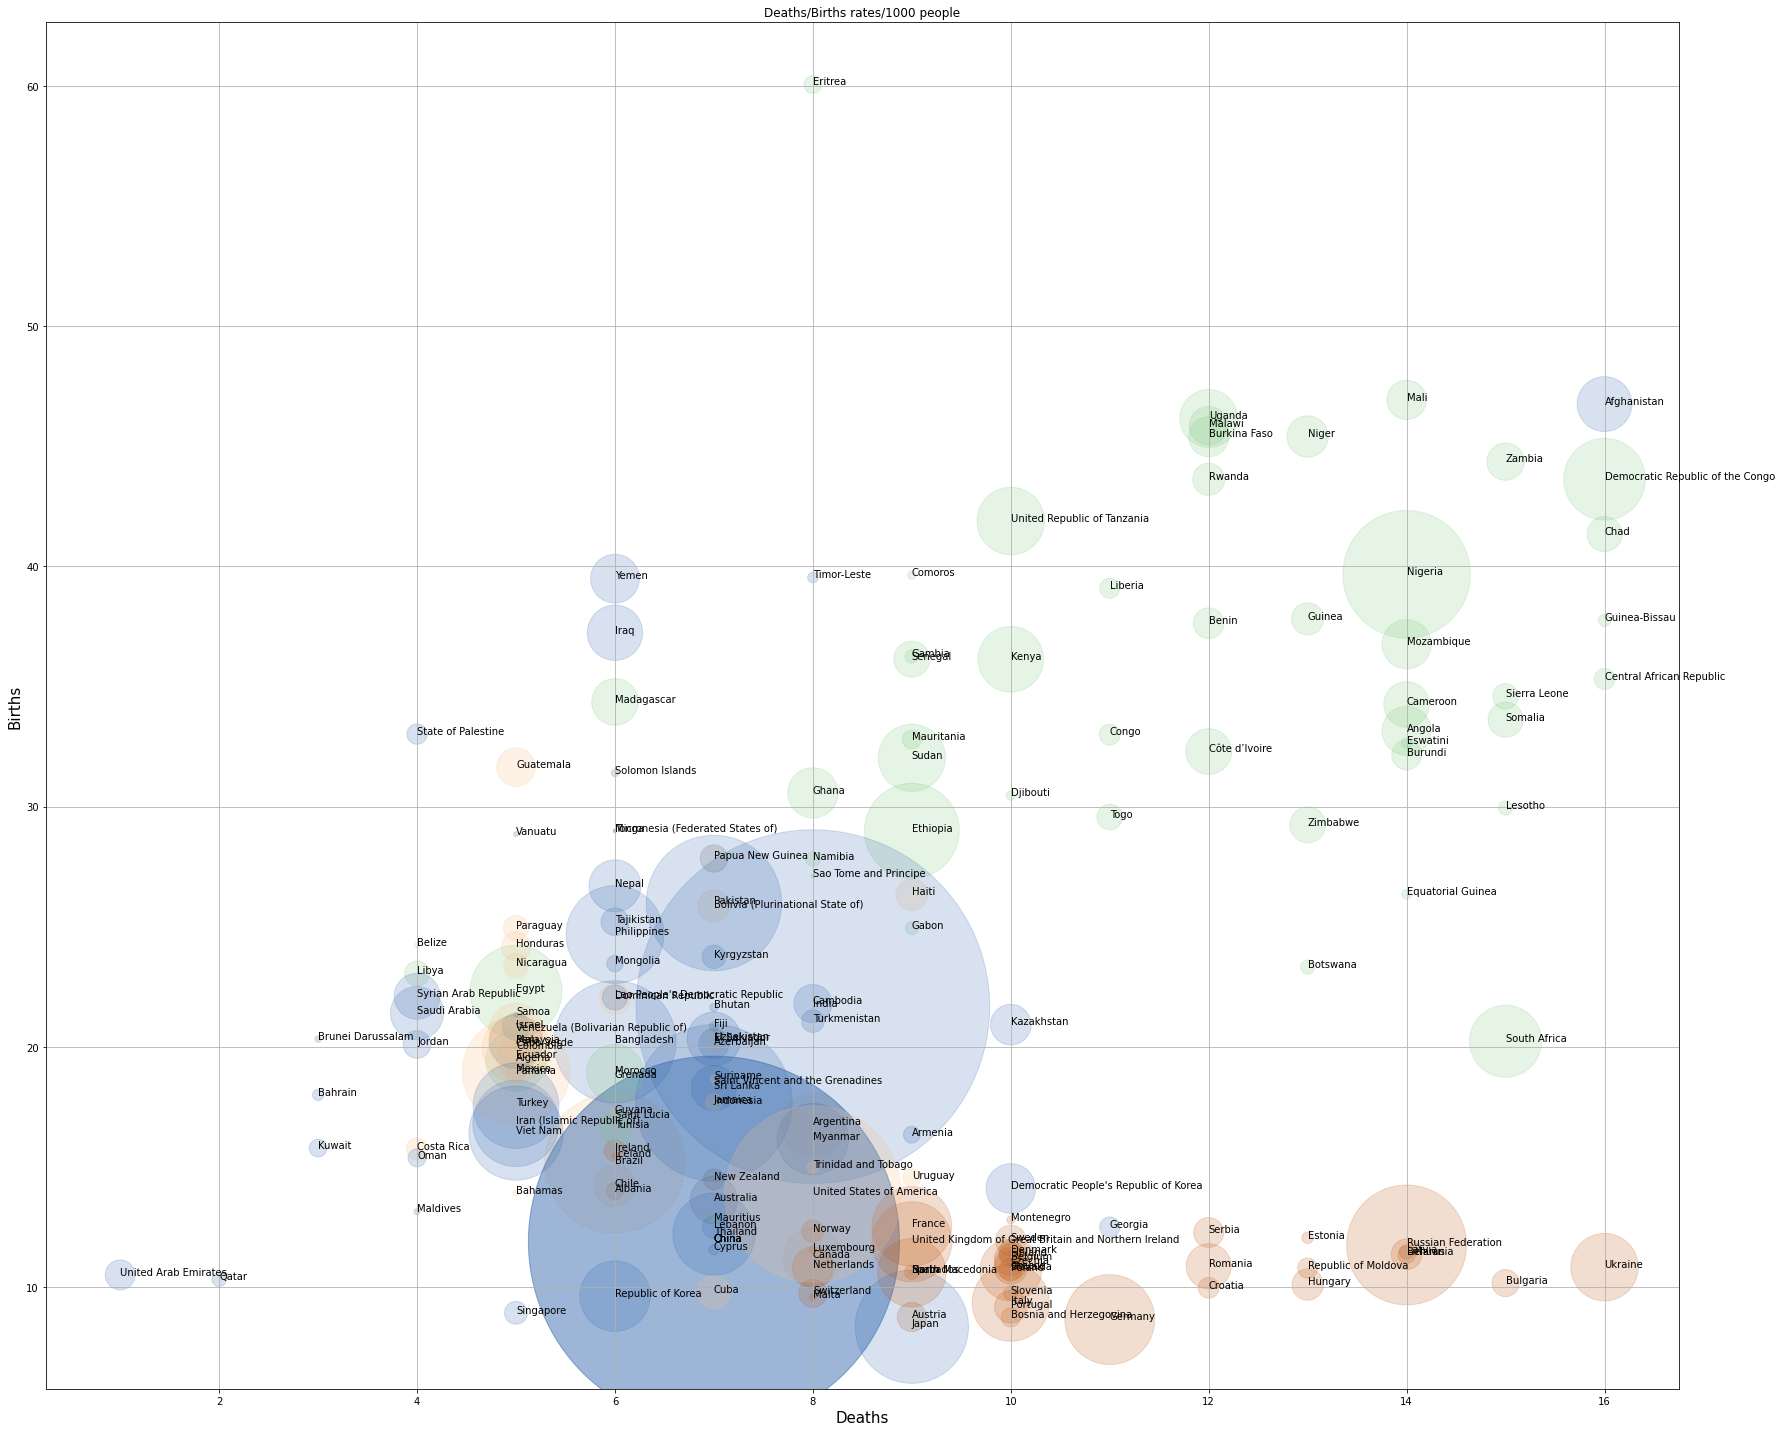

In [10]:


name = "Accent"
my_cmap = get_cmap(name)


#1 population scaterplot with Matplotlib now with rotating colors
merged_df = pd.read_csv('pollastre.csv', header=0) 

#

merged_df['birth_rate'] = merged_df['Births'] / (merged_df['Population'] / 1000)
merged_df['death_rate'] = merged_df['Deaths'] / (merged_df['Population'] / 1000)

# Marker size in units of points^2
v_size = merged_df['Population']/10

# Colors
colors = {'Americas':'red', 'Europe':'green', 'Asia':'blue', 'Oceanias':'yellow', 'Africa': 'black', 
           'Oceania': 'grey'}

plt.rcParams["figure.figsize"] = (25,20)
fig, ax = plt.subplots()
ax.scatter(merged_df['death_rate'], merged_df['birth_rate'], s=v_size, 
           c = merged_df['Region Name'].astype('category').cat.codes, cmap=my_cmap, alpha=0.2)



ax.set_xlabel(r'Deaths', fontsize=15)
ax.set_ylabel(r'Births', fontsize=15)
ax.set_title('Deaths/Births rates/1000 people')

y = merged_df['birth_rate'].to_list()
z = merged_df['death_rate'].to_list()
n = merged_df['Country or Area'].to_list()

ax.grid(True)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]))
fig.tight_layout()

plt.show()

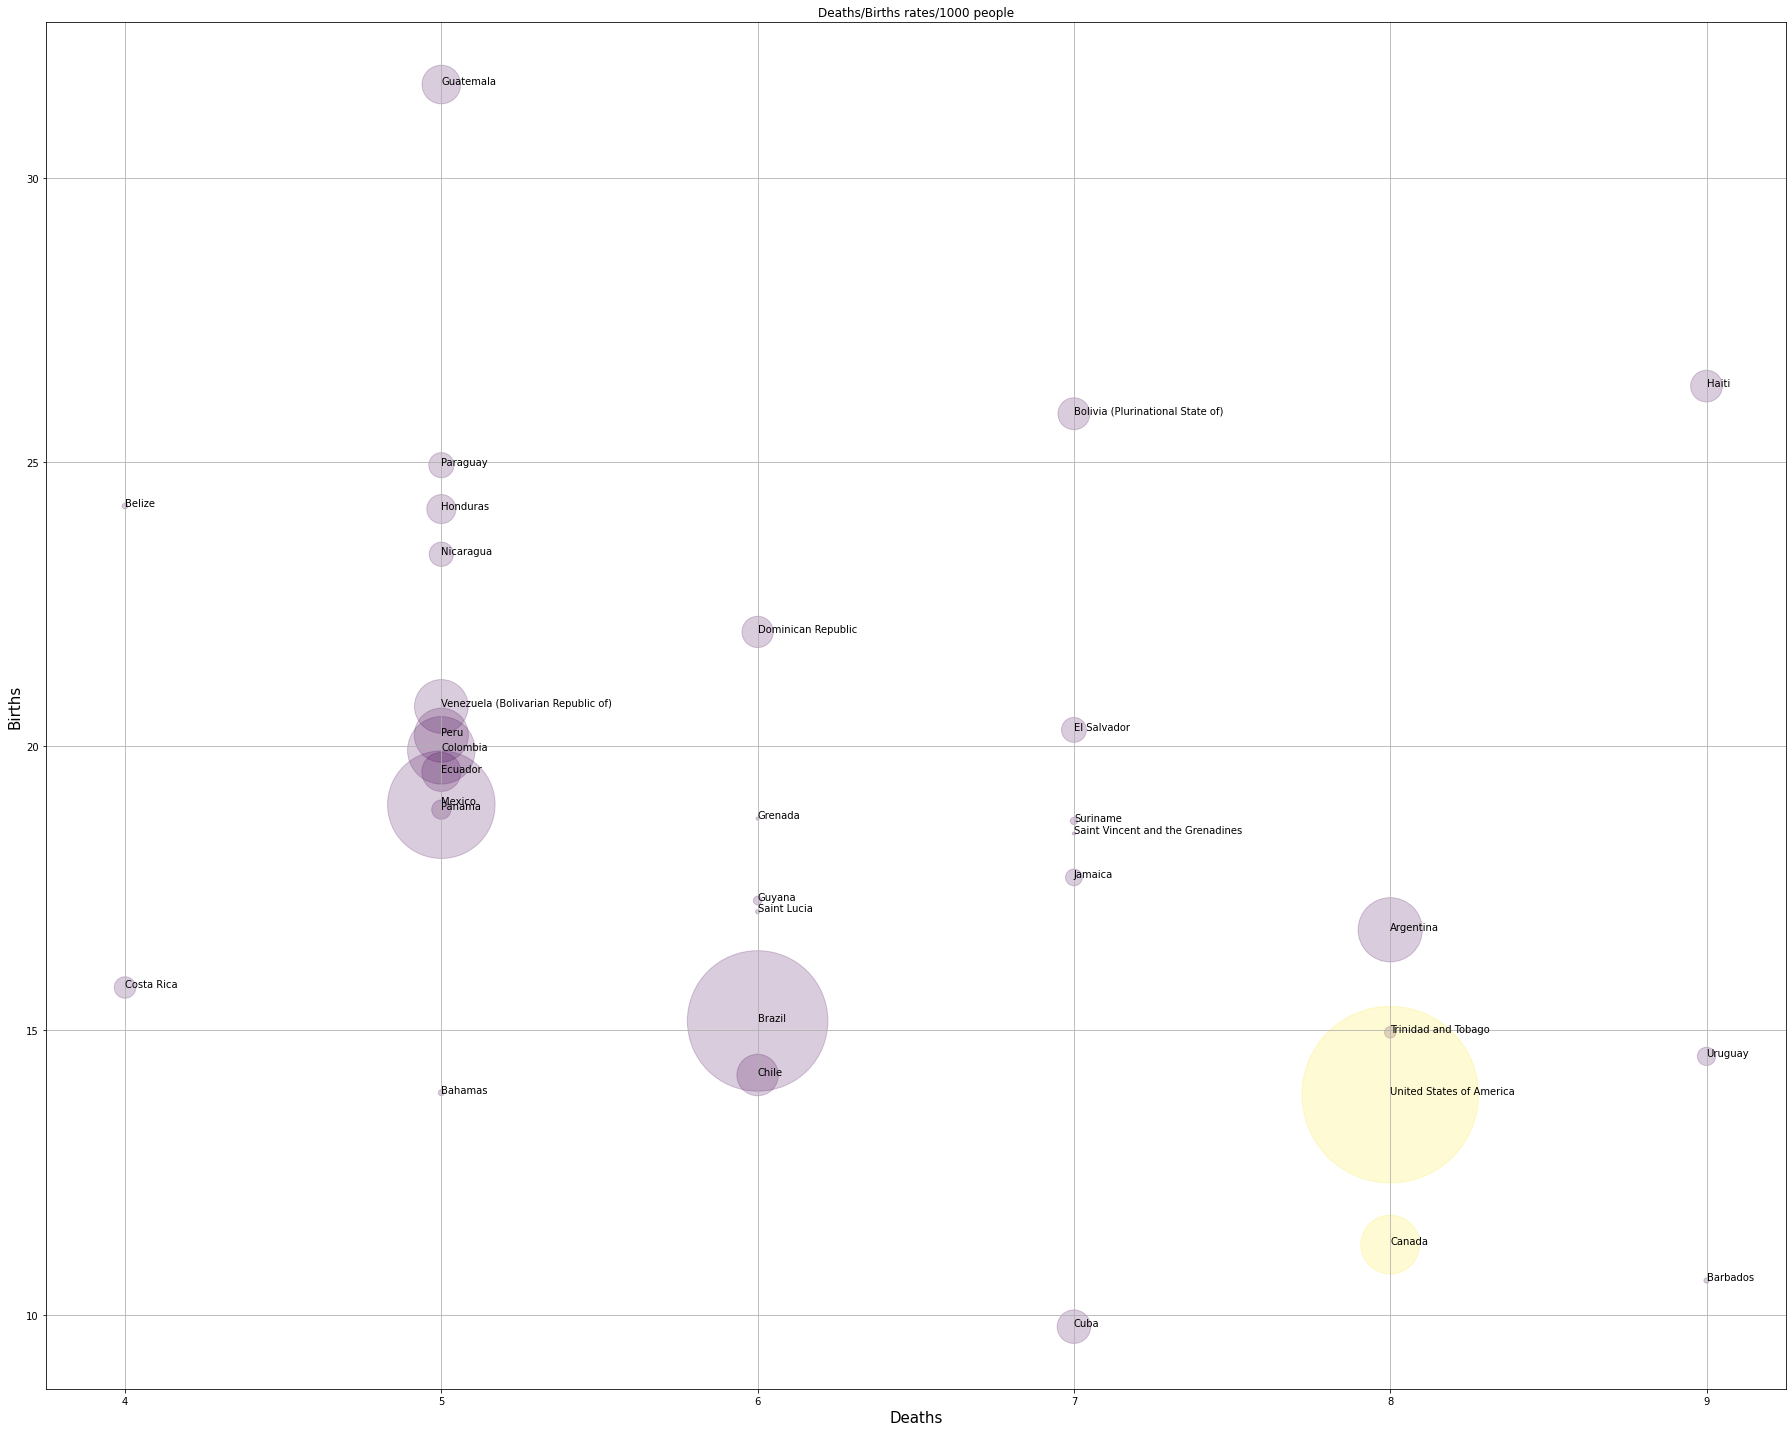

In [11]:
# Subregions with rotating colors
merged_df = pd.read_csv('pollastre.csv', header=0) 


name = "Accent"
my_cmap = get_cmap(name)


#1 population scaterplot with Matplotlib
merged_df=merged_df[merged_df['Region Name']=='Americas']

#

merged_df['birth_rate'] = merged_df['Births'] / (merged_df['Population'] / 1000)
merged_df['death_rate'] = merged_df['Deaths'] / (merged_df['Population'] / 1000)

# Marker size in units of points^2
v_size = merged_df['Population']/10

# Colors


plt.rcParams["figure.figsize"] = (25,20)
fig, ax = plt.subplots()
ax.scatter(merged_df['death_rate'], merged_df['birth_rate'], s=v_size, 
           c = merged_df['Sub-region Name'].astype('category').cat.codes, alpha=0.2)

ax.set_xlabel(r'Deaths', fontsize=15)
ax.set_ylabel(r'Births', fontsize=15)
ax.set_title('Deaths/Births rates/1000 people')

y = merged_df['birth_rate'].to_list()
z = merged_df['death_rate'].to_list()
n = merged_df['Country or Area'].to_list()

ax.grid(True)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]))
fig.tight_layout()

plt.show()

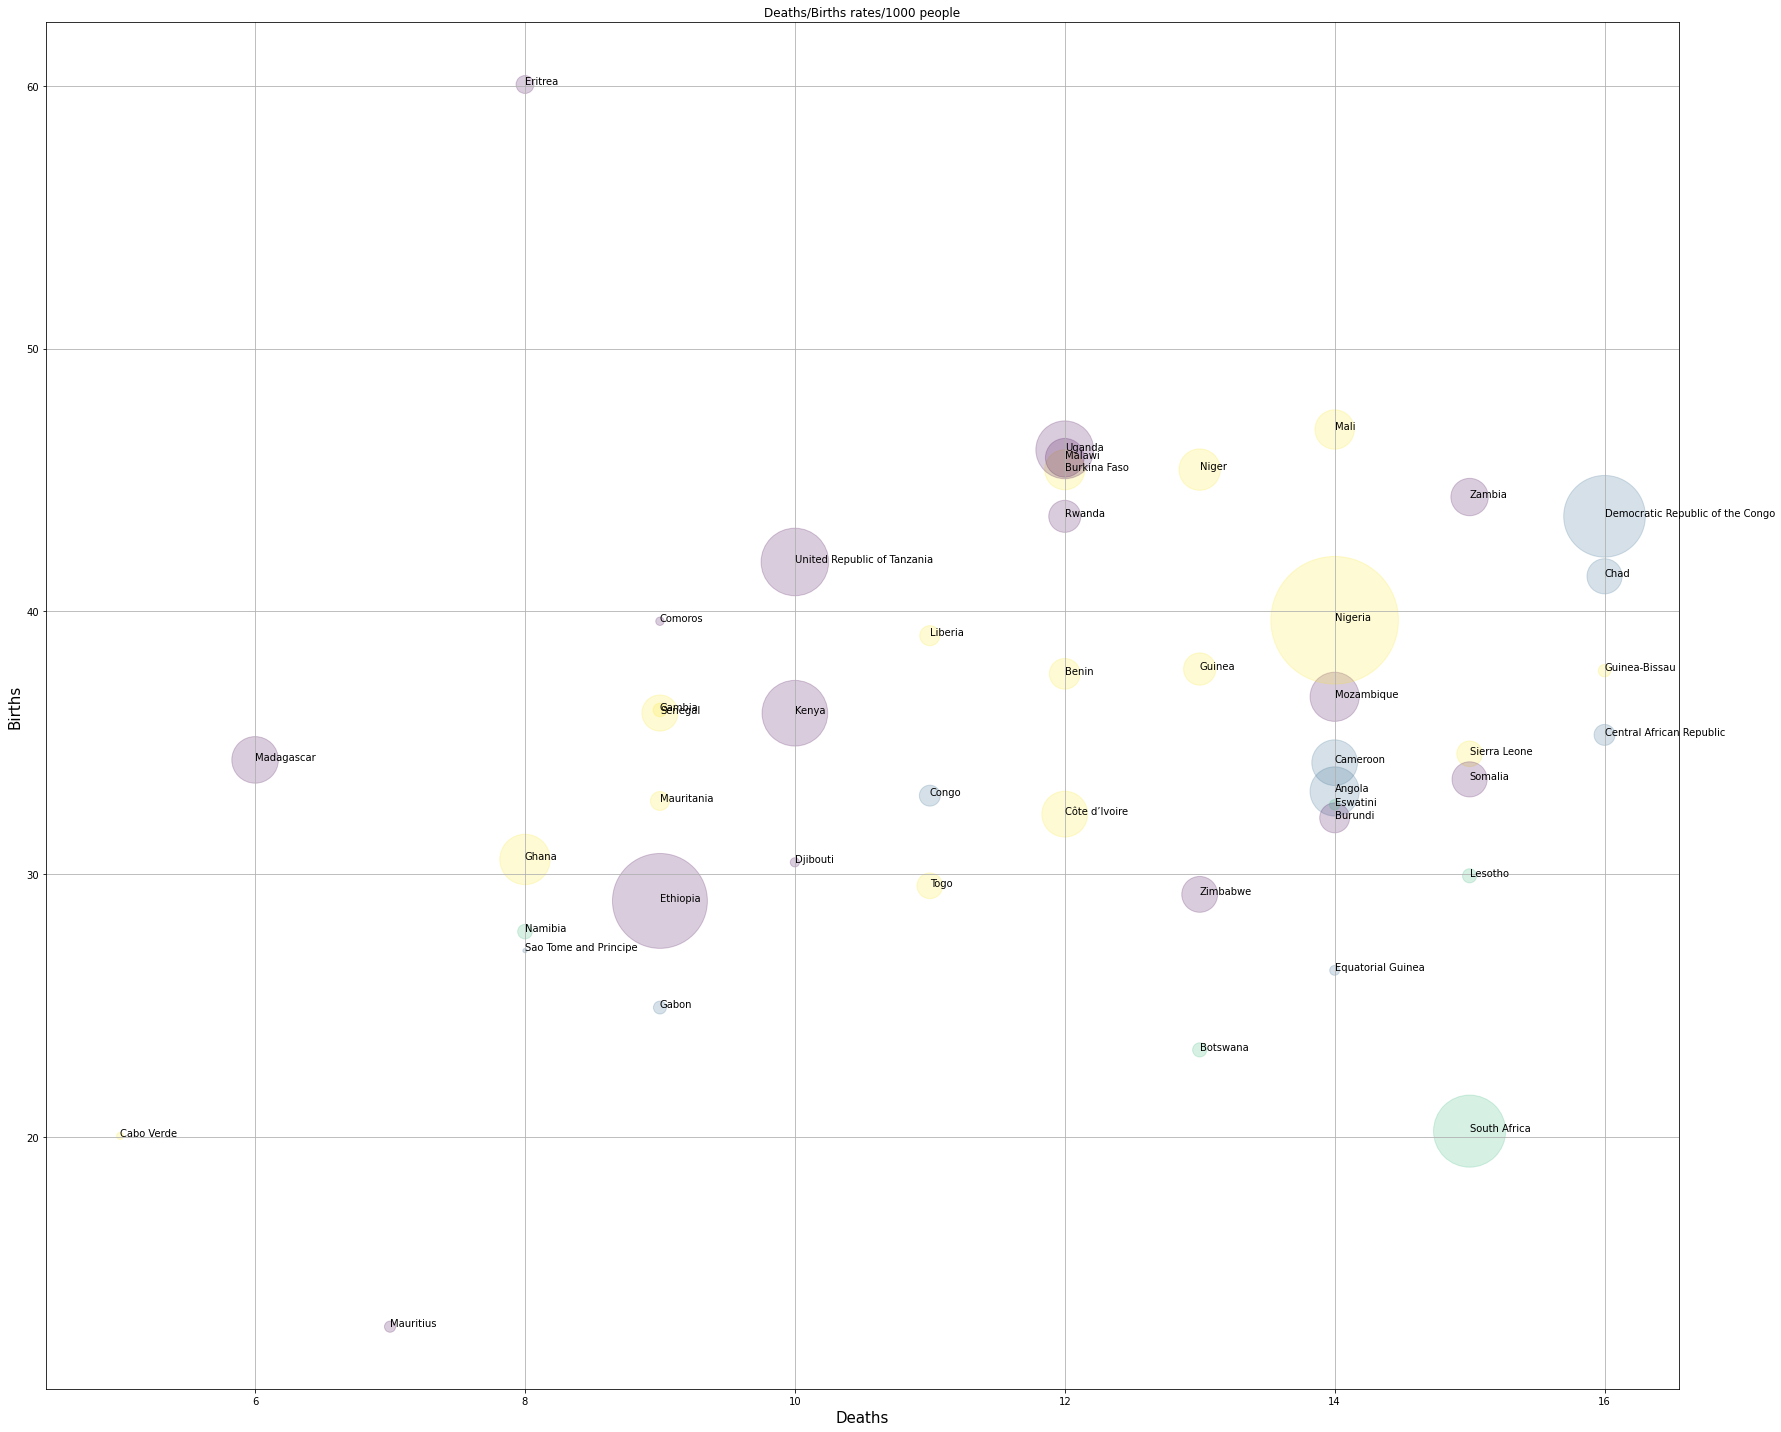

In [22]:
# intermediate region

# Subregions with rotating colors
merged_df = pd.read_csv('pollastre.csv', header=0) 

merged_df=merged_df[merged_df['Region Name']=='Africa']

merged_df = merged_df[merged_df['Intermediate Region Name'].notna()]

name = "Accent"
my_cmap = get_cmap(name)

merged_df['birth_rate'] = merged_df['Births'] / (merged_df['Population'] / 1000)
merged_df['death_rate'] = merged_df['Deaths'] / (merged_df['Population'] / 1000)

# Marker size in units of points^2
v_size = merged_df['Population']/10

# Colors


plt.rcParams["figure.figsize"] = (25,20)
fig, ax = plt.subplots()
ax.scatter(merged_df['death_rate'], merged_df['birth_rate'], s=v_size, 
           c = merged_df['Intermediate Region Name'].astype('category').cat.codes, alpha=0.2)

ax.set_xlabel(r'Deaths', fontsize=15)
ax.set_ylabel(r'Births', fontsize=15)
ax.set_title('Deaths/Births rates/1000 people')

y = merged_df['birth_rate'].to_list()
z = merged_df['death_rate'].to_list()
n = merged_df['Country or Area'].to_list()

ax.grid(True)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]))
fig.tight_layout()

plt.show()